In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import math as math
import matplotlib.pyplot as plt

In [3]:
transactions = pd.read_csv("/Users/zackbrodtman/Downloads/transactions_ds.csv", delimiter = ";")
transactions["date"] = pd.to_datetime(transactions["date"], format='%Y-%m-%d %H:%M:%S')
transactions["day"] = transactions["date"].dt.dayofweek
transactions["month"] = transactions["date"].dt.month
transactions["year"] = transactions["date"].dt.year
transactions.isnull().sum()

item_id           0
quantity          0
price_ht          0
price_ttc         0
transaction_id    0
date              0
day               0
month             0
year              0
dtype: int64

<AxesSubplot:xlabel='day', ylabel='Count'>

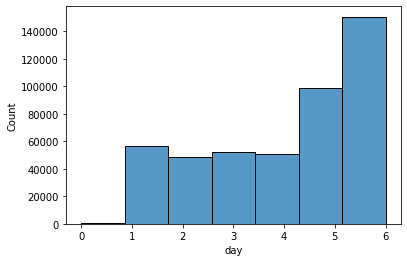

In [4]:
# friday & saturday busiest days
sns.histplot(data = transactions, x = "day", bins =7)

<AxesSubplot:xlabel='month', ylabel='Count'>

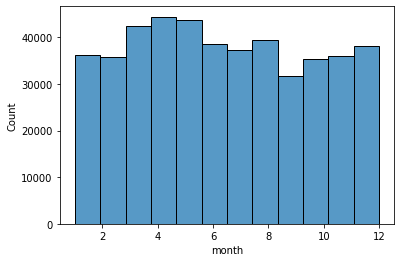

In [5]:
# Spring time busiest month
sns.histplot(transactions["month"], bins =12)

<AxesSubplot:xlabel='year', ylabel='Count'>

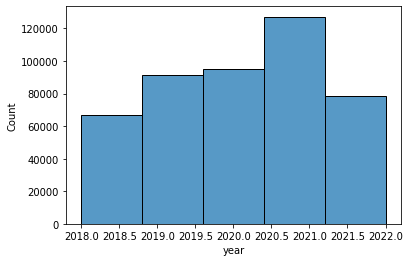

In [6]:
# covid years busier
sns.histplot(transactions["year"], bins = 5)

In [7]:
transactions.groupby('item_id').count()['quantity'].sort_values(ascending=False)[0:20]

item_id
11    60028
55    39303
26    20091
29    19894
28    18906
38    18822
76    17915
40    16147
23    13400
15    13037
36    11880
12    11393
8     11181
7      8723
47     8703
45     8432
24     8320
42     7969
18     7786
25     7648
Name: quantity, dtype: int64

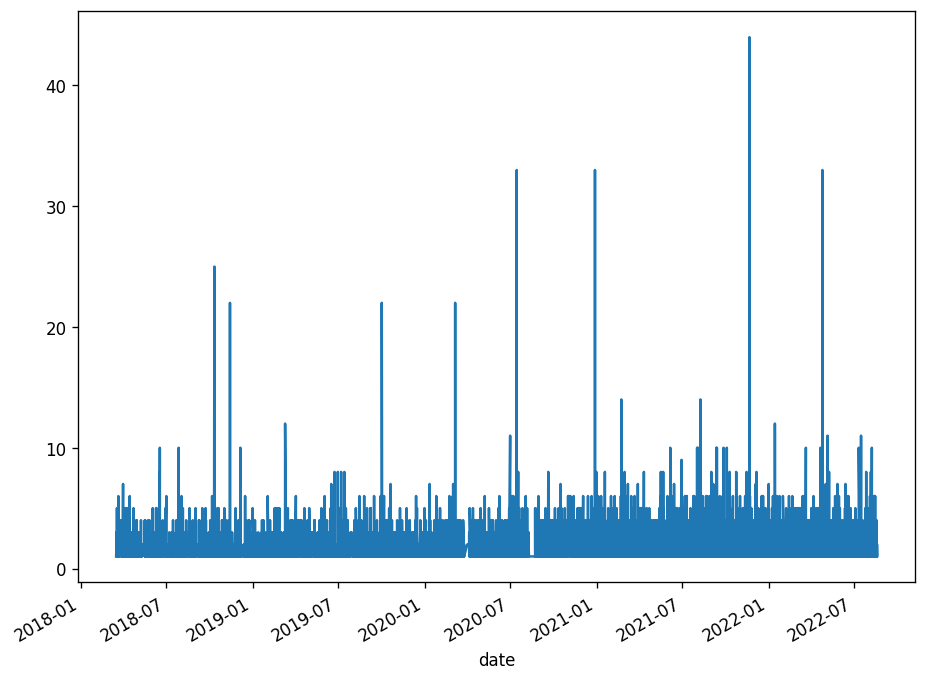

In [73]:
transactions[transactions.item_id==38].set_index('date')['quantity'].plot()
pyplot.show()

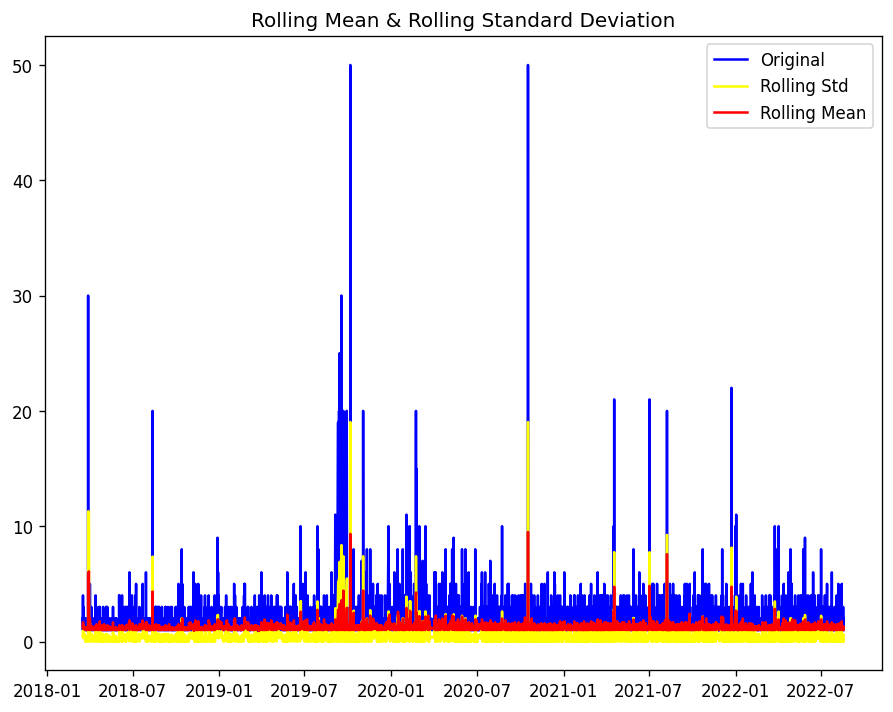

In [86]:
df = transactions[transactions.item_id==55].set_index('date')['quantity']
rolling_mean = df.rolling(window = 12).mean()
rolling_std = df.rolling(window = 12).std()
plt.plot(df, color = 'blue', label = 'Original')
plt.plot(rolling_std, color = 'yellow', label = 'Rolling Std')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [83]:
result = adfuller(df)
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -26.89347579828423
p-value: 0.0
Critical Values:
	1%: -3.4305166002872767
	5%: -2.8616136334612423
	10%: -2.566809192733469


In [132]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA , ARIMAResults
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [98]:
df1 = transactions[transactions.item_id == 55][['date', 'quantity']]

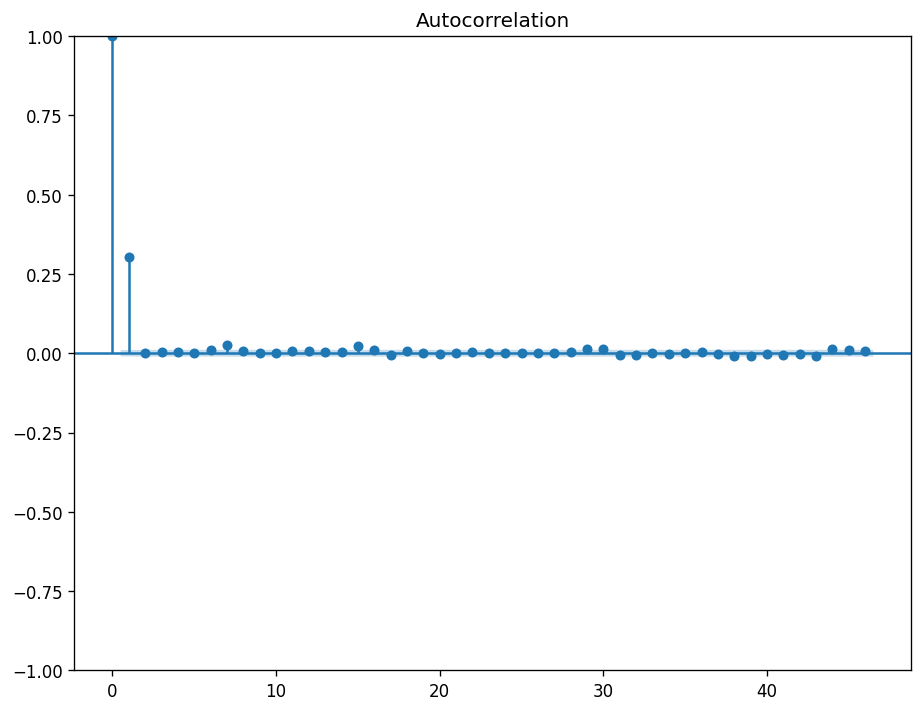

In [104]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
plot_acf(df)
plt.show()

/Users/zackbrodtman/miniforge3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


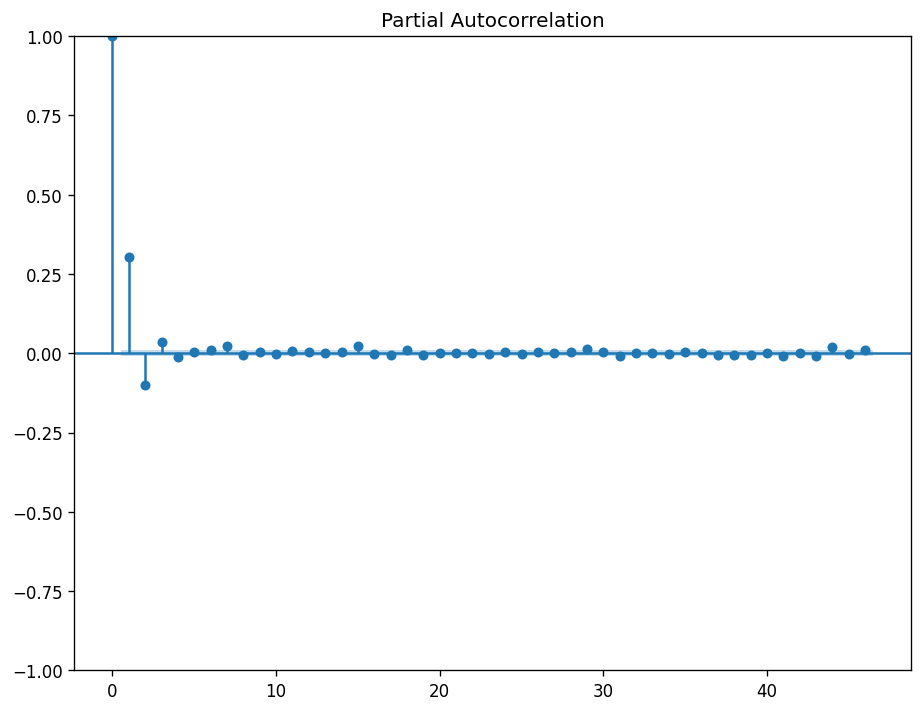

In [103]:
plot_pacf(df)
plt.show()

In [339]:
aic = pd.DataFrame(aic)
aic

ValueError: If using all scalar values, you must pass an index

In [337]:

aic ={}
for p in range(3):
    for q in range(3):
        print(p,q)
        model = ARIMA(train['quantity'], order=(p,0,q))
        aic [str(p)+','+str(q)] = model.fit().aic
        
        

0 0


/Users/zackbrodtman/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/zackbrodtman/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/zackbrodtman/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


0 1


/Users/zackbrodtman/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/zackbrodtman/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/zackbrodtman/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


0 2


/Users/zackbrodtman/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/zackbrodtman/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/zackbrodtman/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


1 0


/Users/zackbrodtman/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/zackbrodtman/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/zackbrodtman/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


1 1


/Users/zackbrodtman/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/zackbrodtman/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/zackbrodtman/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


1 2


/Users/zackbrodtman/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/zackbrodtman/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/zackbrodtman/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


2 0


/Users/zackbrodtman/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/zackbrodtman/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/zackbrodtman/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


2 1


/Users/zackbrodtman/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/zackbrodtman/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/zackbrodtman/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


2 2


/Users/zackbrodtman/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/zackbrodtman/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/zackbrodtman/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [286]:
train = df1[0:int(len(df1)*0.7)]
test = df1[int(len(df1)*0.7):int(len(df1))]

/Users/zackbrodtman/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/zackbrodtman/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/zackbrodtman/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


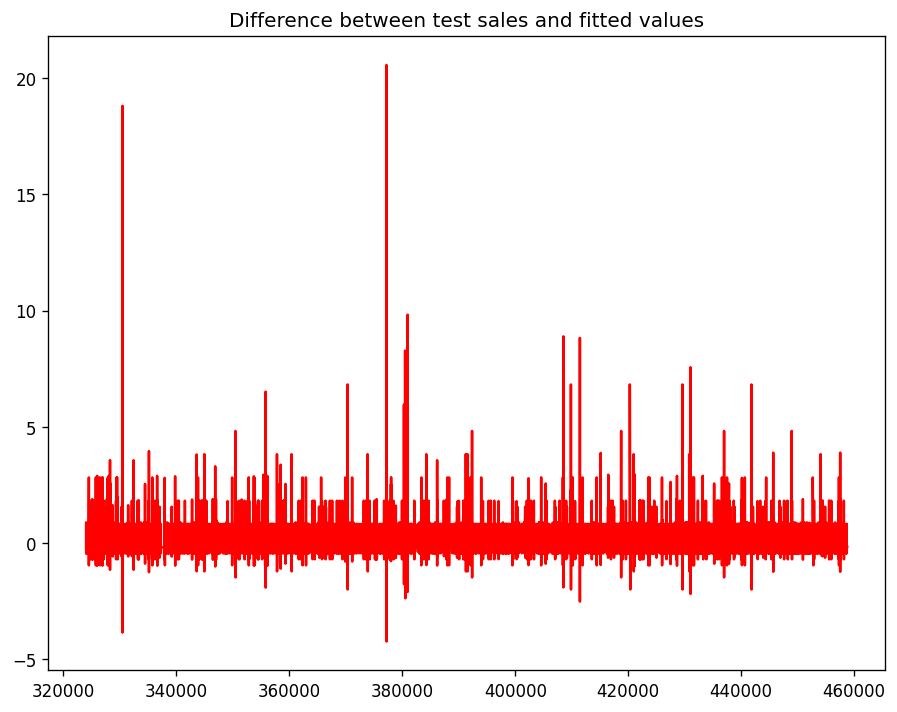

In [287]:
model = ARIMA(test['quantity'], order=(0,0,1))
results = model.fit()
plt.plot(test['quantity']-results.fittedvalues, color='red')
plt.title('Difference between test sales and fitted values')
plt.show()

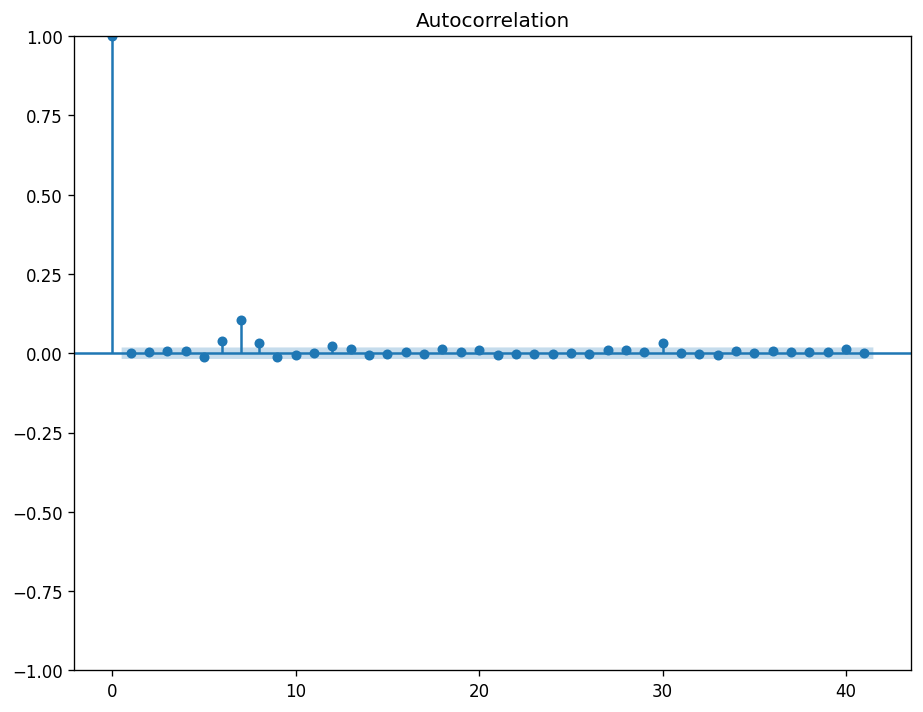

In [288]:
plot_acf(test['quantity']-results.fittedvalues)
plt.show()

/Users/zackbrodtman/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/zackbrodtman/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/zackbrodtman/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Text(0.5, 1.0, 'MA model on training data')

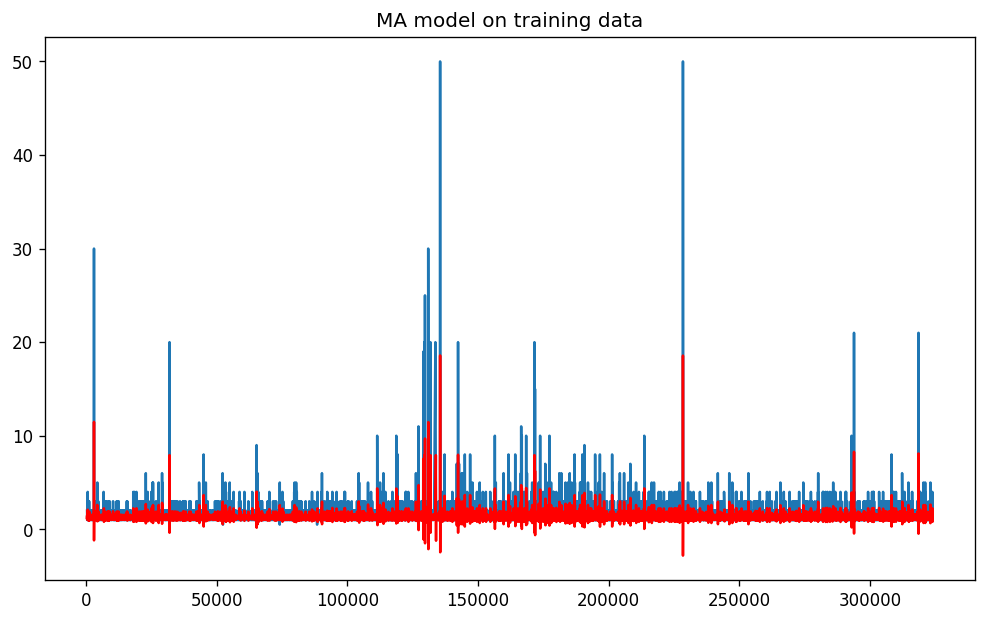

In [177]:
model = ARIMA(train['quantity'], order=(0,0,1))
results = model.fit()
plt.figure(figsize=(10,6))
plt.plot(train['quantity'])
plt.plot(results.fittedvalues, color='red')
plt.title('MA model on training data')

/Users/zackbrodtman/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/zackbrodtman/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/zackbrodtman/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Text(0.5, 1.0, 'MA model on test data')

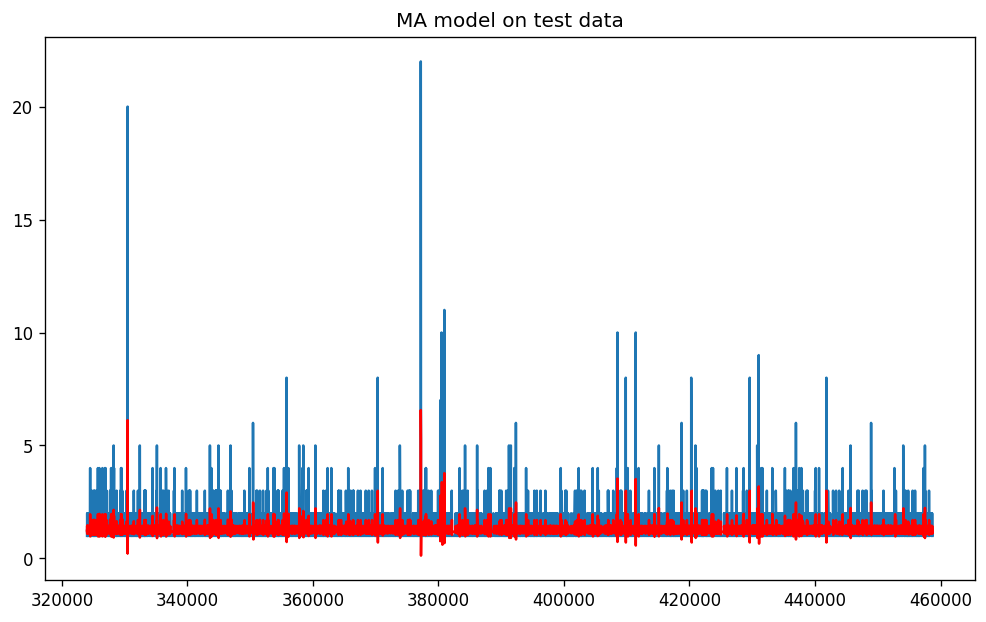

In [289]:
model = ARIMA(test['quantity'], order=(0,0,1))
results = model.fit()
plt.figure(figsize=(10,6))
plt.plot(test['quantity'])
plt.plot(results.fittedvalues, color='red')
plt.title('MA model on test data')

<AxesSubplot:xlabel='date'>

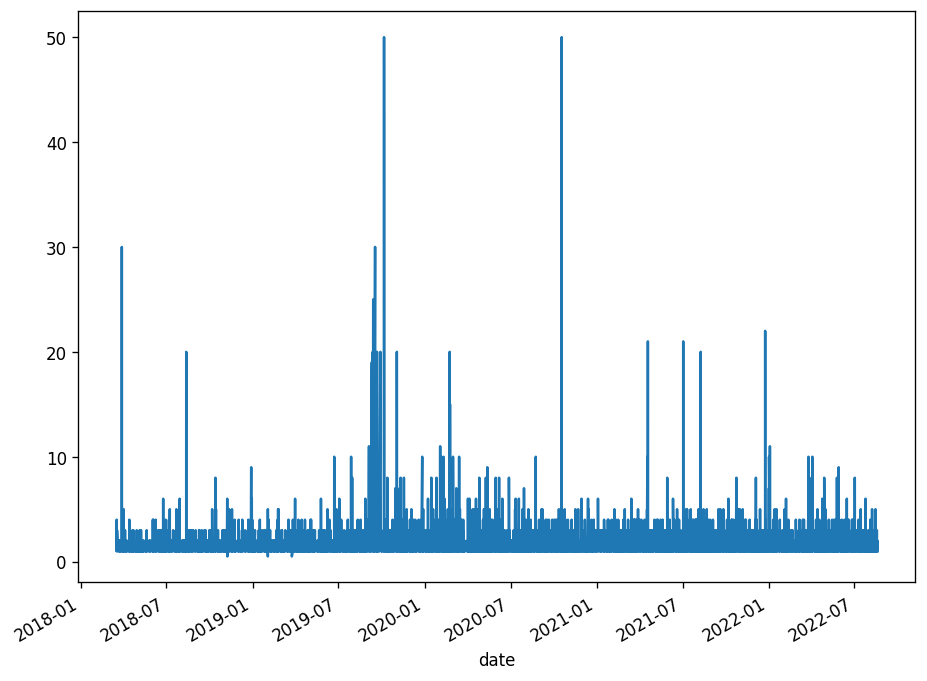

In [53]:
# seasonal product that spikes in january each year
transactions[transactions.item_id==55].set_index('date')['quantity'].plot()

In [74]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(transactions[transactions.item_id==38].set_index('date')['quantity'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -71.380464
p-value: 0.000000


<AxesSubplot:xlabel='date'>

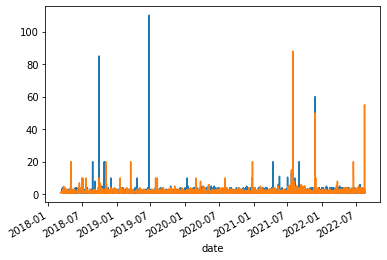

In [9]:
# weird specific orders
transactions[transactions.item_id==26].set_index('date')['quantity'].plot()
transactions[transactions.item_id==29].set_index('date')['quantity'].plot()

<AxesSubplot:xlabel='date'>

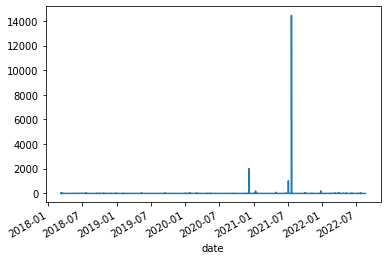

In [10]:
#weird specific order
transactions[transactions.item_id==11].set_index('date')['quantity'].plot()

(array([ 2949., 50490., 11049., 65691., 51703., 40952., 37320., 31879.,
        28067., 22748., 16582., 15714., 13275., 10935.,  9140.,  7420.,
         6292.,  5214.,  4454.,  3739.,  3121.,  2755.,  2108.,  1969.,
         1668.,  1413.,  1167.,   964.,   820.,   724.,   688.,   583.,
          513.,   411.,   420.,   265.,   292.,   232.,   315.,   146.]),
 array([ 0.  ,  0.75,  1.5 ,  2.25,  3.  ,  3.75,  4.5 ,  5.25,  6.  ,
         6.75,  7.5 ,  8.25,  9.  ,  9.75, 10.5 , 11.25, 12.  , 12.75,
        13.5 , 14.25, 15.  , 15.75, 16.5 , 17.25, 18.  , 18.75, 19.5 ,
        20.25, 21.  , 21.75, 22.5 , 23.25, 24.  , 24.75, 25.5 , 26.25,
        27.  , 27.75, 28.5 , 29.25, 30.  ]),
 <BarContainer object of 40 artists>)

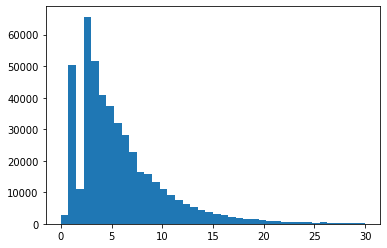

In [11]:
#cheaper items sell exponentially more
plt.hist(transactions["price_ht"], bins = 40, range = (0,30))

In [186]:
transactions.groupby(['date']).head()

,item_id,quantity,price_ht,price_ttc,transaction_id,date,day,month,year
0,0,1.0,12.42,13.1,1,2018-03-08 13:10:59+00:00,3,3,2018
1,1,1.0,12.42,13.1,1,2018-03-08 13:10:59+00:00,3,3,2018
2,2,1.0,12.42,13.1,1,2018-03-08 13:10:59+00:00,3,3,2018
3,3,1.0,12.42,13.1,1,2018-03-08 13:10:59+00:00,3,3,2018
4,1,1.0,11.56,12.2,2,2018-03-08 13:12:07+00:00,3,3,2018
...,...,...,...,...,...,...,...,...,...
458725,11,1.0,1.14,1.2,311970,2022-08-18 18:38:26+00:00,3,8,2022
458726,45,1.0,5.02,5.3,311972,2022-08-18 18:43:42+00:00,3,8,2022
458727,11,1.0,5.02,5.3,311972,2022-08-18 18:43:42+00:00,3,8,2022
458728,11,1.0,1.14,1.2,311973,2022-08-18 18:47:43+00:00,3,8,2022


Text(0.5, 1.0, 'Sales per 2 weeks')

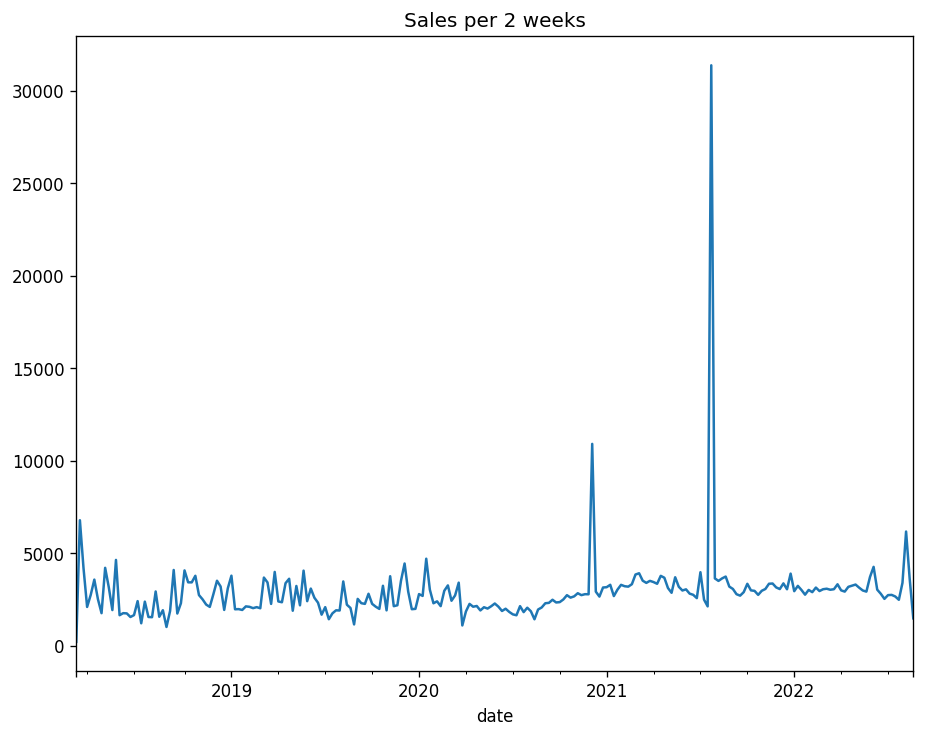

In [327]:
week2 = transactions.resample('2W', on='date').quantity.sum()
transactions.resample('W', on='date').quantity.sum().plot()
plt.title('Sales per 2 weeks')

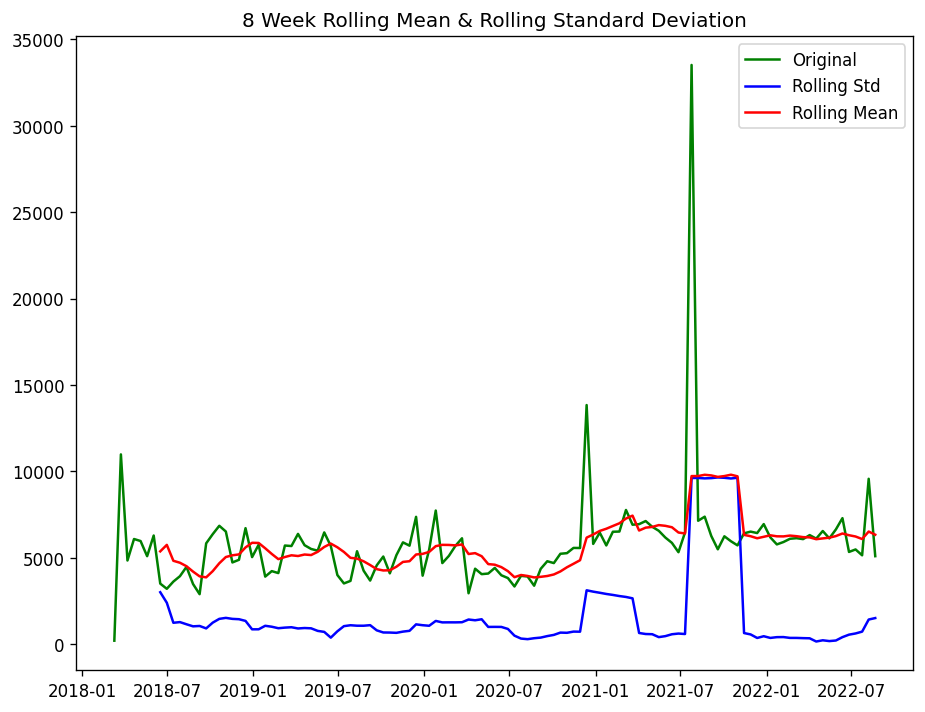

In [328]:
rolling_mean = week2.rolling(window = 8).mean()
rolling_std = week2.rolling(window = 8).std()
plt.plot(week2, color = 'green', label = 'Original')
plt.plot(rolling_std, color = 'blue', label = 'Rolling Std')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.legend(loc = 'best')
plt.title('8 Week Rolling Mean & Rolling Standard Deviation')
plt.show()

In [329]:
result = adfuller(week2)
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -9.689135540827225
p-value: 1.1489940001060935e-16
Critical Values:
	1%: -3.4880216384691867
	5%: -2.8867966864160075
	10%: -2.5802408234244947


/Users/zackbrodtman/miniforge3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


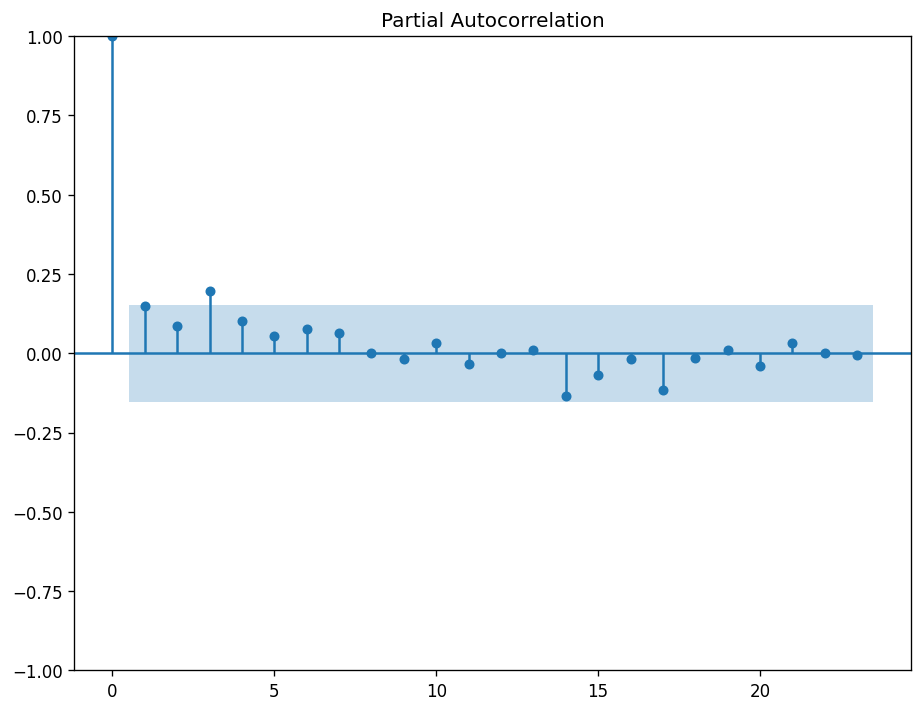

In [330]:
plot_pacf(train2)
plt.show()

In [331]:
train2 = week2.values[0:int(len(week2)*0.7)]
test2 = week2.values[int(len(week2)*0.7):int(len(week2))]

aic2 ={}
for p in range(3):
    for q in range(3):
        print(p,q)
        model2 = ARIMA(train2, order=(p,0,q))
        aic2 [str(p)+','+str(q)] = model2.fit().aic
        
aic2

0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2


/Users/zackbrodtman/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/zackbrodtman/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/zackbrodtman/miniforge3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'0,0': 1441.0777057863927,
 '0,1': 1441.9928363024565,
 '0,2': 1439.8822712622657,
 '1,0': 1441.892649051903,
 '1,1': 1439.9698614027495,
 '1,2': 1439.6366917797257,
 '2,0': 1438.5360491107588,
 '2,1': 1439.6945295487046,
 '2,2': 1436.4717690359626}

/Users/zackbrodtman/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Text(0.5, 1.0, 'ARMA (2,2) model on test data')

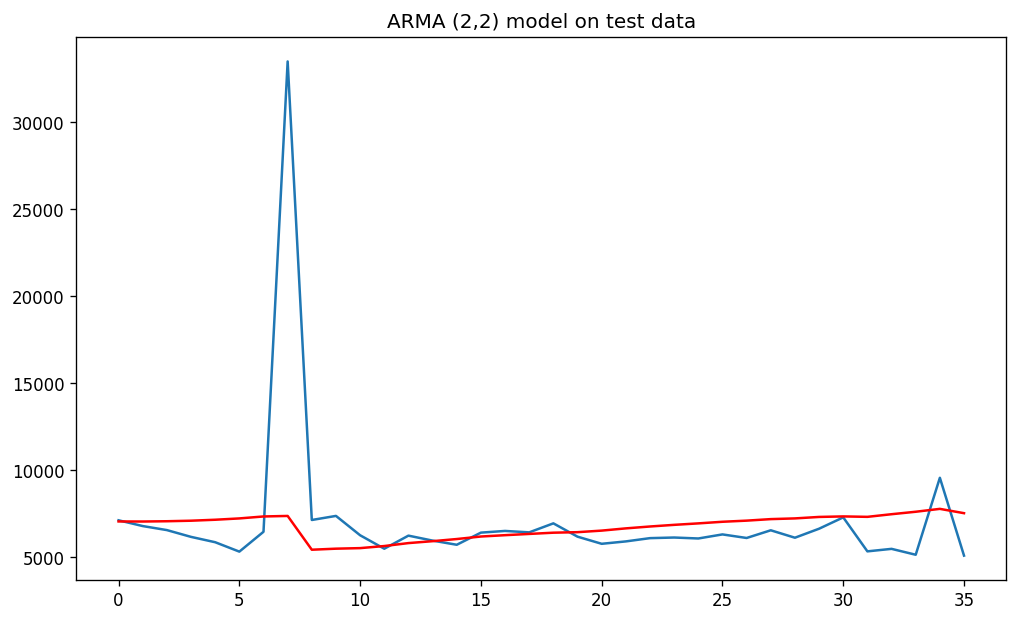

In [333]:
model3 = ARIMA(test2, order=(2,0,2))
results3 = model3.fit()
plt.figure(figsize=(10,6))
plt.plot(test2)
plt.plot(results3.fittedvalues, color='red')
plt.title('ARMA (2,2) model on test data')

<AxesSubplot:xlabel='date'>

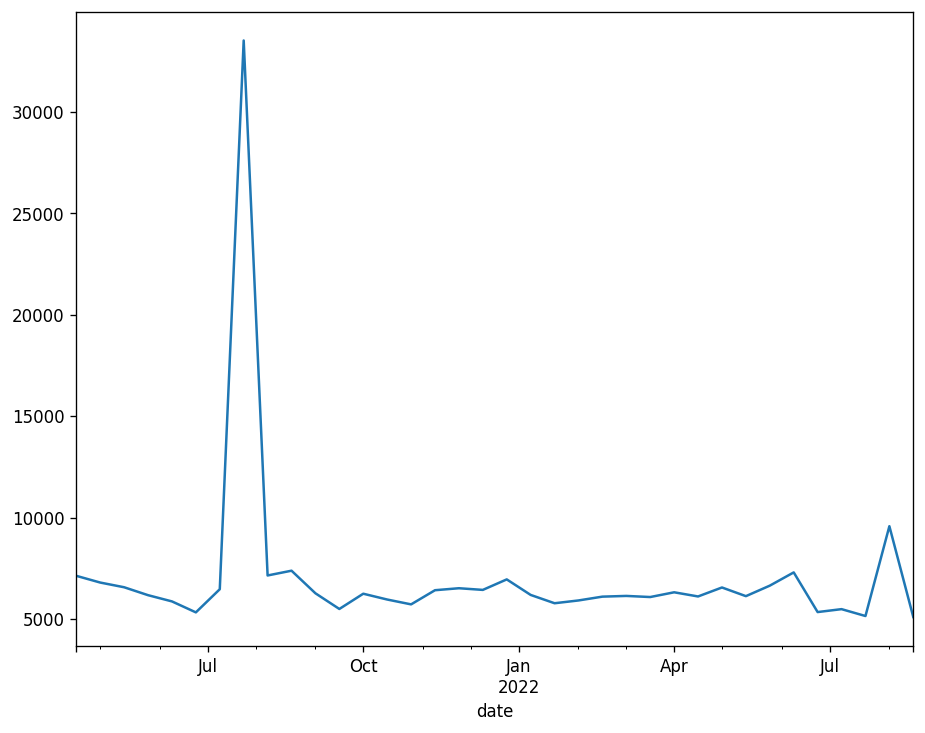

In [299]:
test2.plot()